# Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# read the data

In [2]:
df = pd.read_csv(r'BankNoteAuthentication.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Explore data analysis (EDA)

<AxesSubplot:>

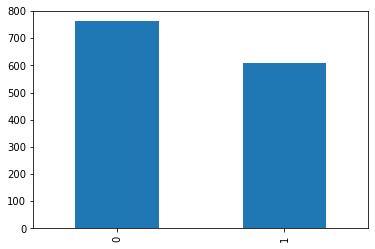

In [4]:
df['class'].value_counts().plot.bar()

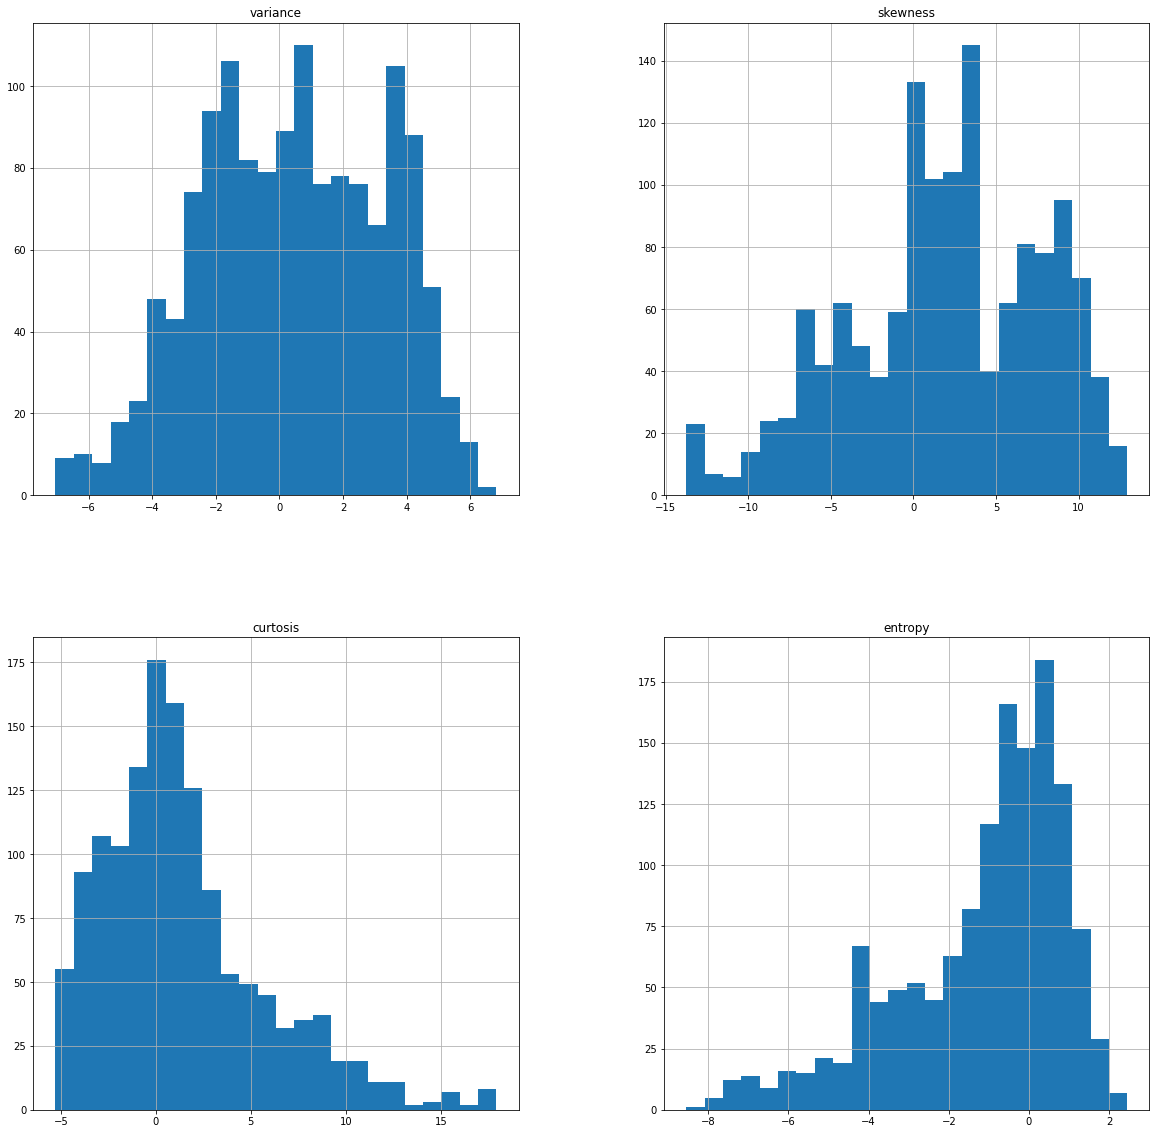

In [5]:
hist = df.iloc[:, :-1].hist(bins=24, figsize=(20,20))


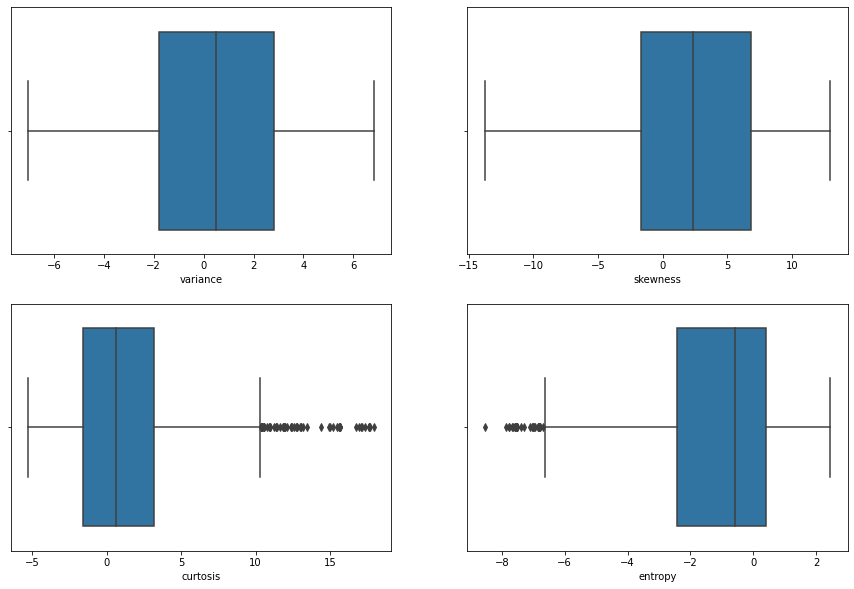

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.boxplot(x=df["variance"] ,ax=axes[0, 0])
sns.boxplot(x=df["skewness"] ,ax=axes[0, 1])
sns.boxplot(x=df["curtosis"] ,ax=axes[1, 0])
sns.boxplot(x=df["entropy"] ,ax=axes[1, 1])
plt.show()

<AxesSubplot:>

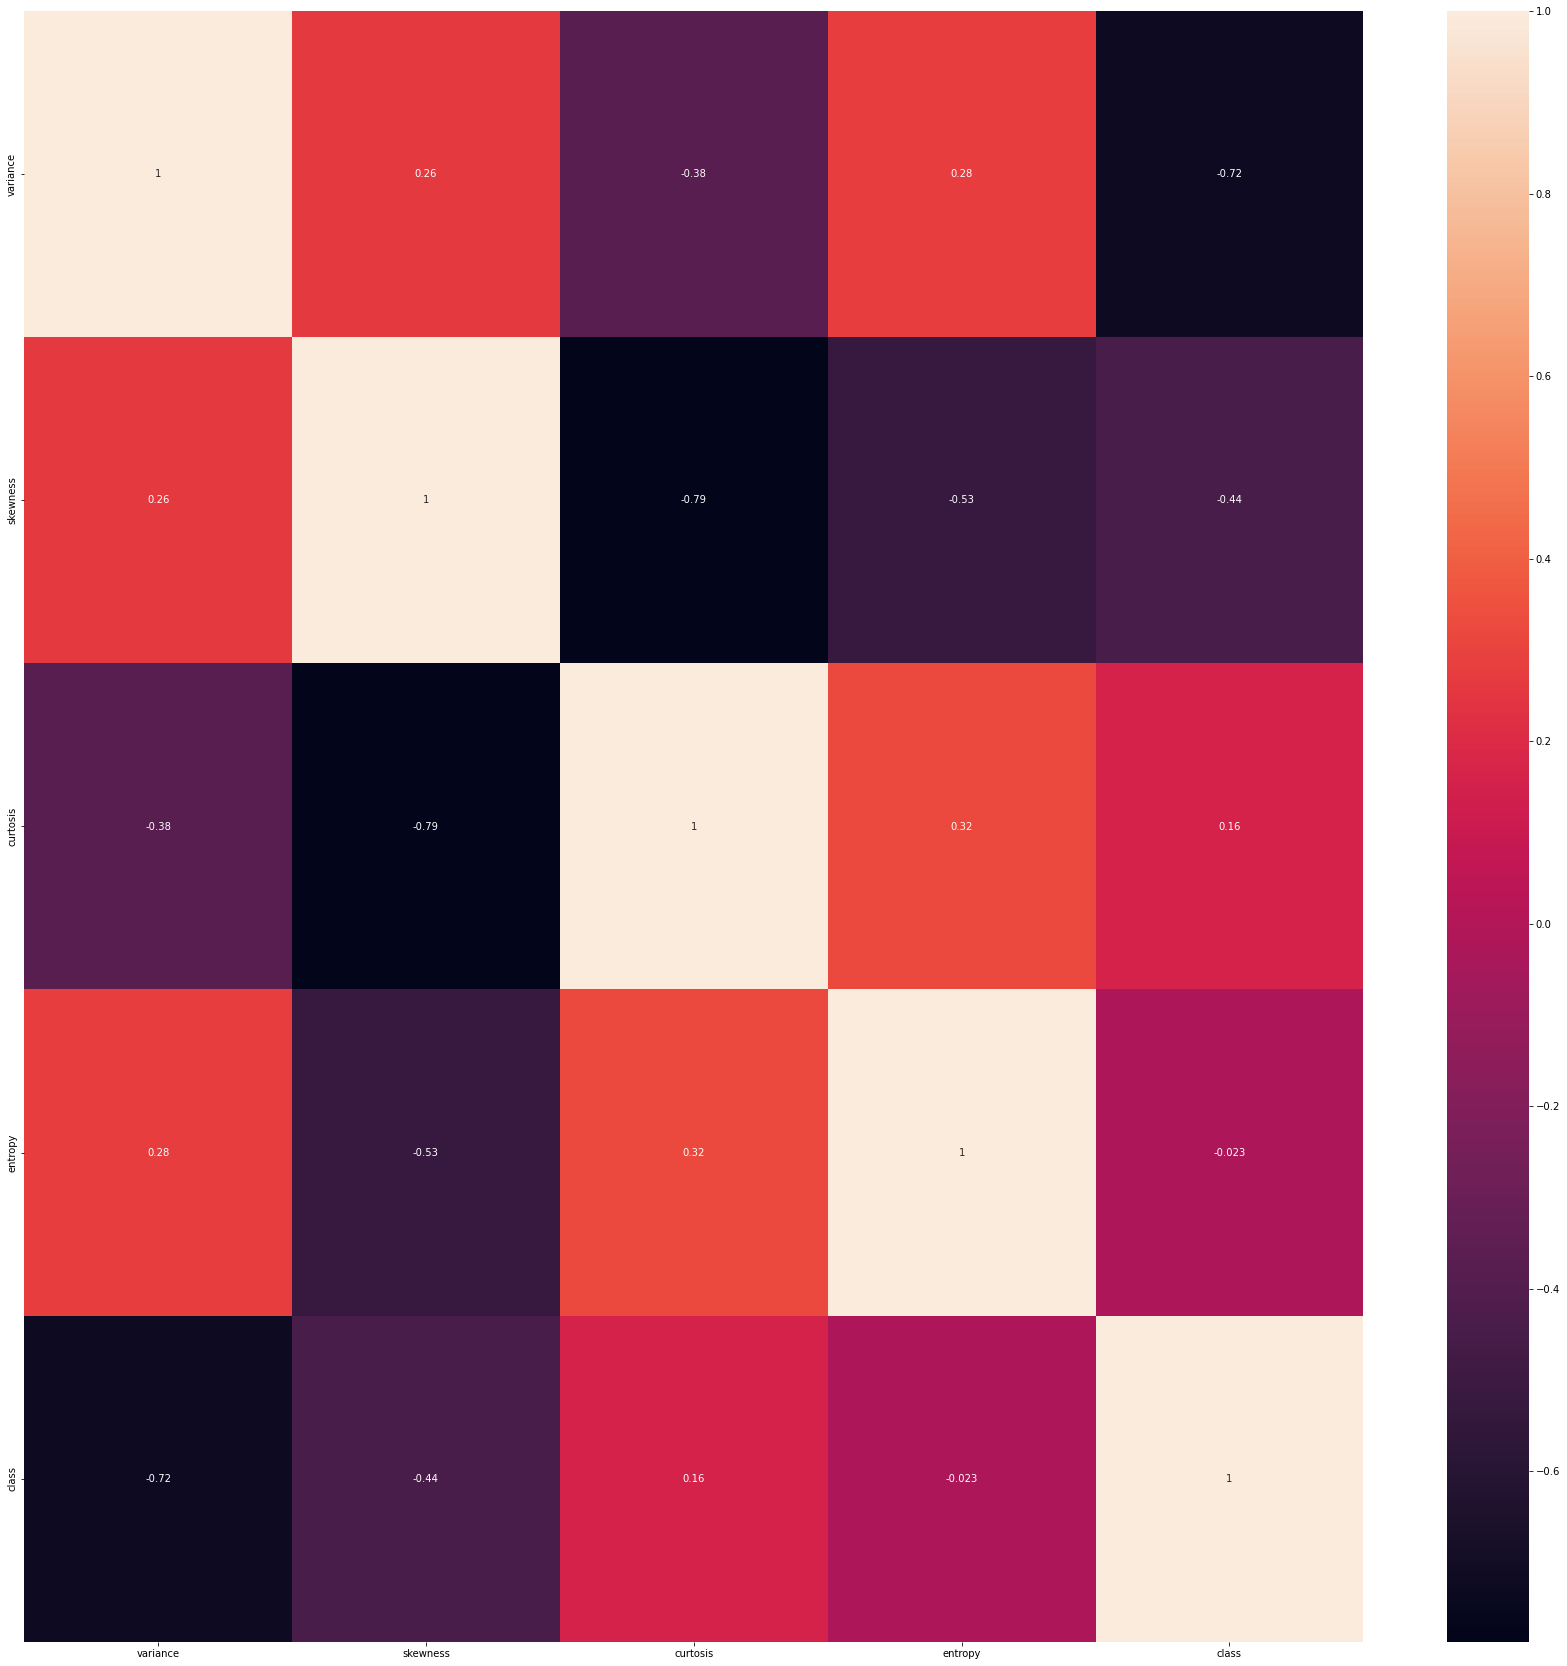

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Data pre-processing 

In [8]:
df.duplicated().sum()

24

In [9]:
df = df.drop_duplicates()

In [10]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [11]:
x=df.drop("class",axis=1)
y=df["class"]

In [12]:
# Retaining all components for visualization
pca = PCA()
pca_data = pca.fit_transform(x)


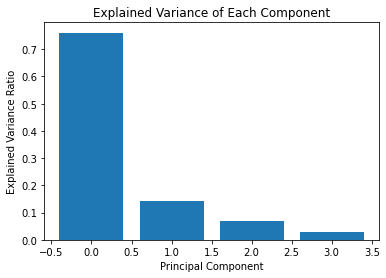

In [13]:
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Component')
plt.show()


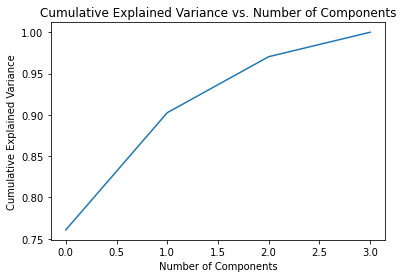

In [14]:
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()


In [15]:
n_components = 3  # or another number based on your choice
pca = PCA(n_components=n_components)
x = pca.fit_transform(x)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.8,random_state =42)

In [22]:
scaler = RobustScaler()
df2 = scaler.fit_transform(x)


# Modeling

Model 1(XGB)

In [23]:
xgb_classifier = xgb.XGBClassifier()
# Fit the model to the training data
model1=xgb_classifier.fit(X_train, y_train)

In [24]:
y_pred = xgb_classifier.predict(X_test)

In [25]:
def cf_plot(score_array,title):
    plt.figure(figsize=(9,7))
    cf_matrix = confusion_matrix(y_test,y_pred=score_array.predict(X_test))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues',annot_kws={"size":15})
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('Actual Label',size=15)
    plt.title(f'Confusion Matrix for {title}',size=15)
    print(classification_report(y_test,y_pred=score_array.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       600
           1       0.96      1.00      0.98       479

    accuracy                           0.98      1079
   macro avg       0.98      0.98      0.98      1079
weighted avg       0.98      0.98      0.98      1079



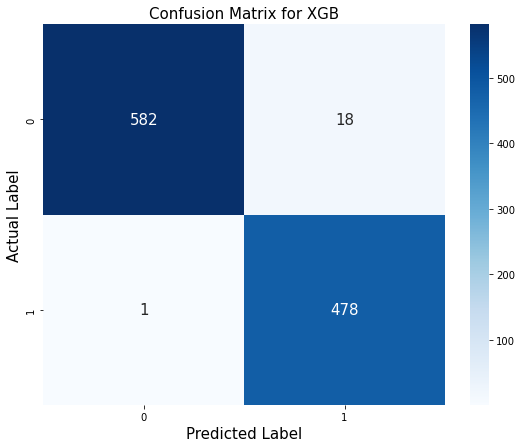

In [26]:
cf_plot(model1,'XGB')

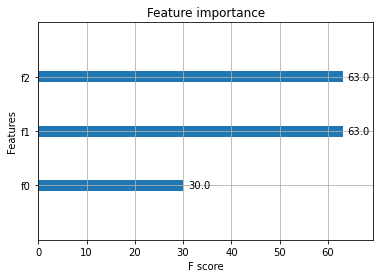

In [27]:
plot_importance(xgb_classifier)
plt.show()

Model 2 (LR)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       600
           1       0.98      1.00      0.99       479

    accuracy                           0.99      1079
   macro avg       0.99      0.99      0.99      1079
weighted avg       0.99      0.99      0.99      1079



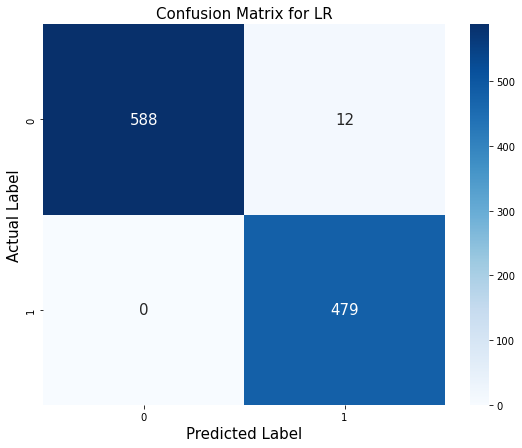

In [42]:
lr=LogisticRegression()
model2=lr.fit(X_train, y_train)
predictions=lr.predict(X_test)
cf_plot(model2,'LR')

Model 3 (KNN)

In [43]:
k = 2
model3=knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [44]:
y_pred = knn_classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       600
           1       0.99      0.99      0.99       479

    accuracy                           0.99      1079
   macro avg       0.99      0.99      0.99      1079
weighted avg       0.99      0.99      0.99      1079



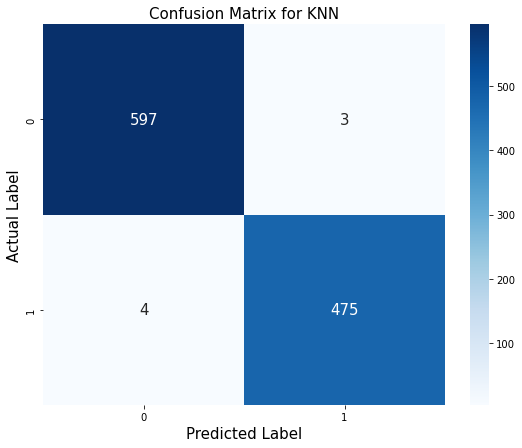

In [45]:
cf_plot(model3,'KNN')